In [2]:
from env1 import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [59]:
from math import sqrt

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [28]:
def get_db_url(db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
query = '''SELECT * FROM employees limit 10'''

In [29]:
pd.read_sql(query, get_db_url('employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [6]:
df = pd.read_csv("telco_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

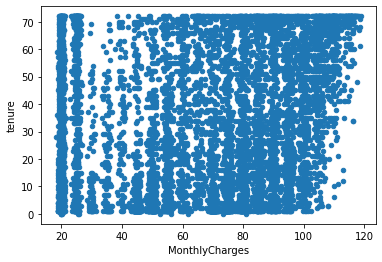

In [11]:
# does tenure correlate with monthly charges? no

df.plot.scatter(y='tenure', x='MonthlyCharges')

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

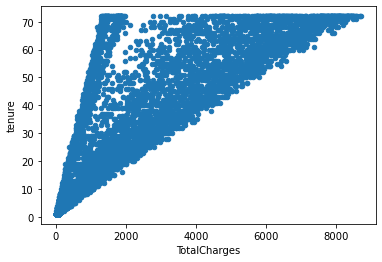

In [12]:
# total charges

df.plot.scatter(y='tenure', x='TotalCharges')

AttributeError: 'DataFrame' object has no attribute 'Tenure'

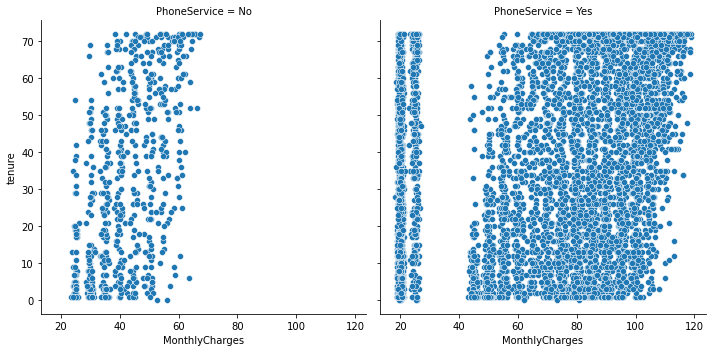

In [13]:
#control for phone and internet service?

sns.relplot(data=df, y='tenure', x='MonthlyCharges', col='PhoneService')

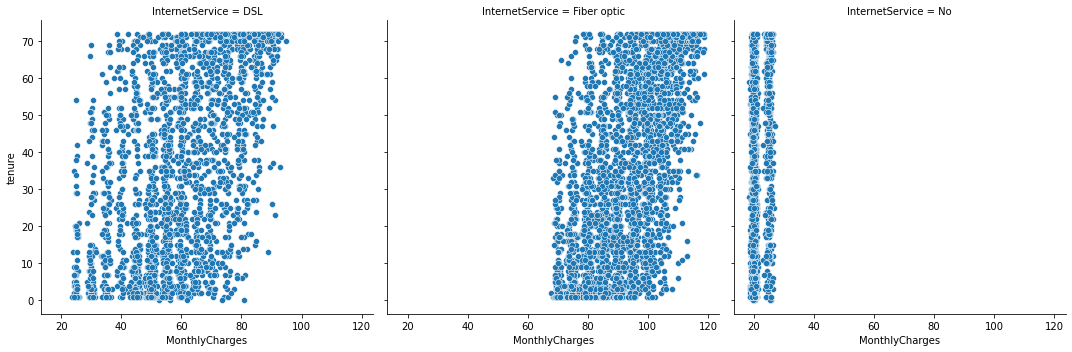

In [14]:
sns.relplot(data=df, y='tenure', x='MonthlyCharges', col='InternetService')

In [18]:
#2 
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [31]:
# Is there a relationship between how long an employee has been with the company and their salary?

employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [40]:
salaries.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,13150
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13367
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,13087
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12992
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12992


In [39]:
salaries = pd.read_sql('SELECT *, datediff(now(), employees.hire_date) AS tenure FROM employees join salaries using (emp_no) join titles using (emp_no) where salaries.to_date > now()', url)
salaries

##current employees

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,13150
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13367
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,13087
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12992
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371238,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Engineer,1987-08-30,1992-08-29,13216
371239,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Senior Engineer,1992-08-29,9999-01-01,13216
371240,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01,10484
371241,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Staff,1993-12-27,1998-12-27,10484


In [43]:
r, p = stats.pearsonr(salaries.tenure, salaries.salary)

print('p=', p)
print('r=', r)

p= 0.0
r= 0.3072819093214674


In [55]:
#Is there a relationship between how long an employee has been with the company and the number of titles they have had?a

titles = pd.read_sql('SELECT emp_no, datediff(now(), hire_date) AS tenure, count(*) as title_count from employees join titles using (emp_no) group by emp_no', url)
titles.head()

,emp_no,tenure,title_count
0,10001,13150,1
1,10002,13367,1
2,10003,13087,1
3,10004,12992,2
4,10005,11976,2


In [56]:
r, p = stats.pearsonr(titles.tenure, titles.title_count)

print('p=', p)
print('r=', r)

p= 0.0
r= 0.2665989299136619


<AxesSubplot:xlabel='title_count', ylabel='tenure'>

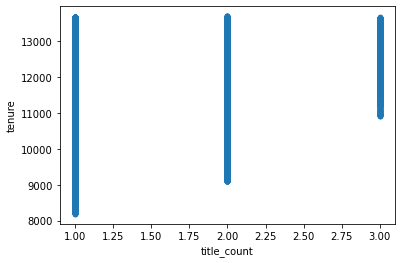

In [57]:
titles.plot.scatter(y='tenure', x='title_count')

In [61]:
#3
sleepstudy = data('sleepstudy')
sleepstudy.head(3)

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308


In [68]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


<AxesSubplot:xlabel='Reaction', ylabel='Days'>

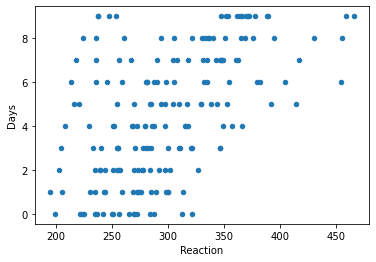

In [62]:
sleepstudy.plot.scatter(y='Days', x='Reaction')

In [63]:
r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)

print('p=', p)
print('r=', r)

p= 9.894096322214812e-15
r= 0.5352302262650253


<AxesSubplot:xlabel='Reaction'>

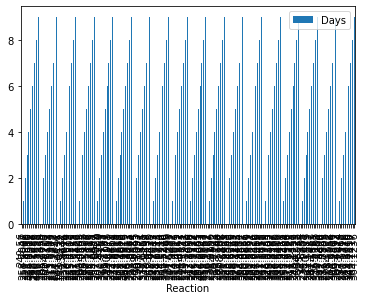

In [64]:
sleepstudy.plot.bar(y='Days', x='Reaction')